<a href="https://colab.research.google.com/github/RajneeshPrajapati11/Deeplearning/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Delhi_v2.csv")

# Display the first few rows of the dataframe
print(data.head())







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0       price                                            Address  \
0           0   5600000.0                  Noida Extension, Noida, Delhi NCR   
1           1   8800000.0                      Sector 79, Gurgaon, Delhi NCR   
2           2  16500000.0                     Vaishali, Ghaziabad, Delhi NCR   
3           3   3810000.0  Link Road, F Block, Sector 50, Noida, Uttar Pr...   
4           4   6200000.0  Jaypee Pavilion Court Sector 128, Noida, Secto...   

     area   latitude  longitude  Bedrooms  Bathrooms  Balcony  \
0  1350.0  28.608850  77.460560       3.0        3.0      NaN   
1  1490.0  28.374236  76.952416       3.0        3.0      NaN   
2  2385.0  28.645769  77.385110       4.0        5.0      NaN   
3  1050.0  28.566914  77.436434       2.0        2.0      3.0   
4  1350.0  28.520732  77.356491       2.0        2.0      3.0   


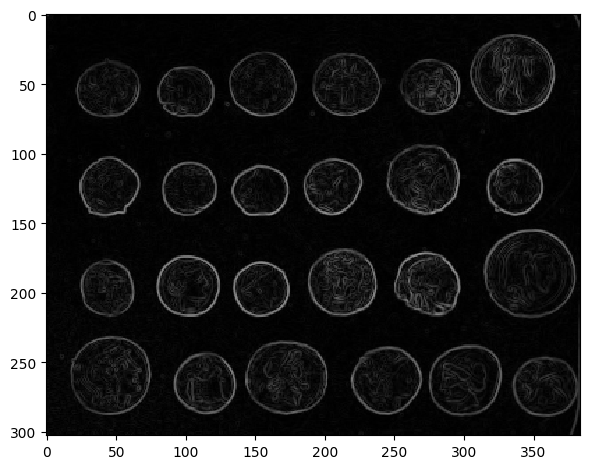

In [12]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges = ski.filters.sobel(image)

ski.io.imshow(edges)
ski.io.show()

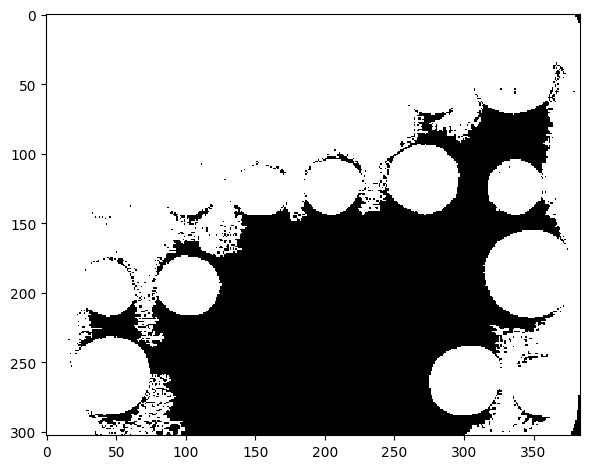

In [15]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges = ski.filters.apply_hysteresis_threshold(image, 50, 250)

ski.io.imshow(edges)
ski.io.show()

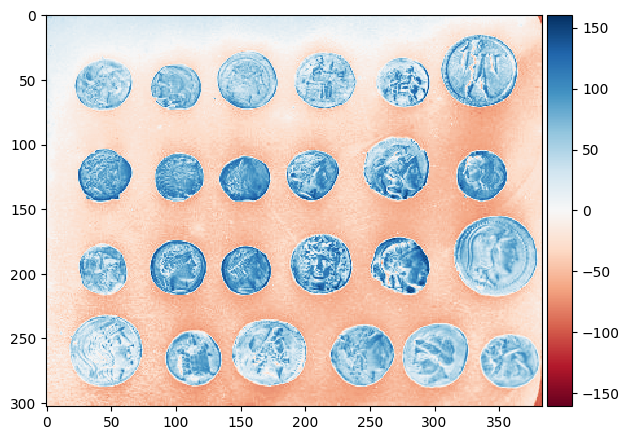

In [19]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges =  ski.filters.butterworth(
    image,
    cutoff_frequency_ratio=0.005,
    high_pass=True,
    order=2.0,
    channel_axis=None,
    squared_butterworth=True,
    npad=0
)


ski.io.imshow(edges)
ski.io.show()

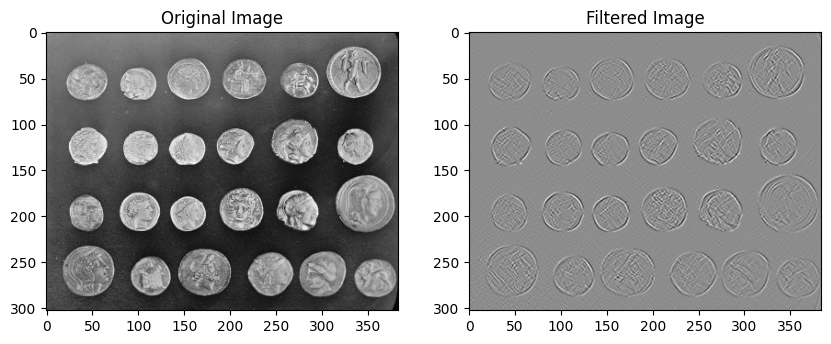

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters

# Load image and define kernel
image = data.coins()
kernel = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])

# Apply the sparse correlation filter
edges = filters.correlate_sparse(image, kernel, mode='reflect')

# Display the original and filtered images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Filtered Image')
plt.show()


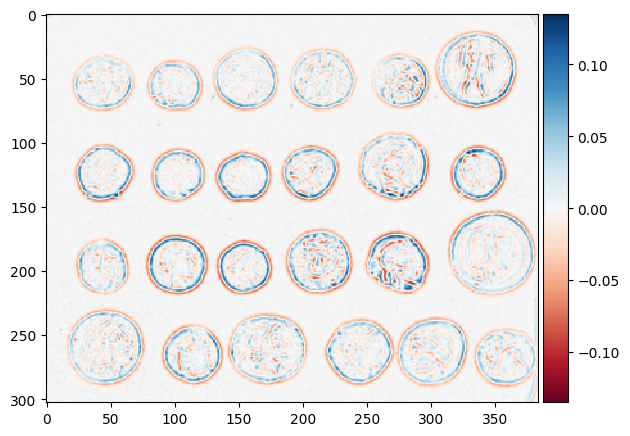

In [22]:
import skimage as ski

image = ski.data.coins()
low_sigma = 1
high_sigma = 5
edges =ski.filters.difference_of_gaussians(image, low_sigma, high_sigma=None, mode='nearest', cval=0, channel_axis=None, truncate=4.0)

ski.io.imshow(edges)
ski.io.show()

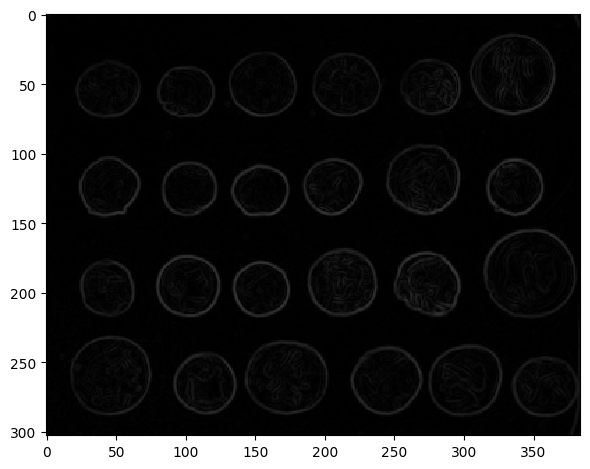

In [23]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges = ski.filters.farid(image, mask=None,axis=None, mode='reflect', cval=0.0)

ski.io.imshow(edges)
ski.io.show()

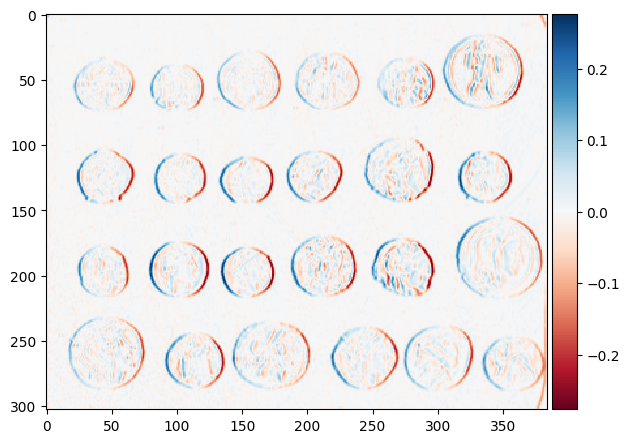

In [24]:
import skimage as skimage

image = ski.data.coins()
# ... or any other NumPy array!
edges = skimage.filters.farid_v(image, mask=None)

ski.io.imshow(edges)
ski.io.show()

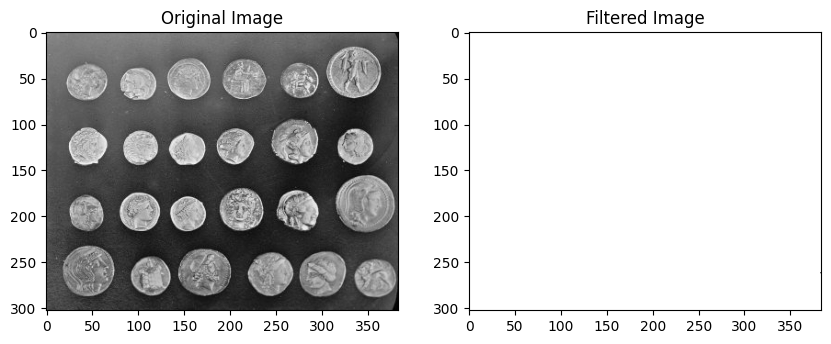

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, restoration, filters

def inverse_filter(image, impulse_response, filter_params=None, max_gain=2, predefined_filter=None):
    """
    Apply an inverse filter to the image.

    Parameters:
    - image: The input image.
    - impulse_response: The impulse response of the filter.
    - filter_params: Parameters for the filter (optional).
    - max_gain: Maximum gain for the inverse filter (default is 2).
    - predefined_filter: Predefined filter to apply (optional).

    Returns:
    - The filtered image.
    """
    # Check if a predefined filter is provided
    if predefined_filter is not None:
        impulse_response = predefined_filter

    # Perform inverse filtering
    if impulse_response is not None:
        # Compute the Fourier transform of the image and impulse response
        image_fft = np.fft.fft2(image)
        impulse_response_fft = np.fft.fft2(impulse_response, s=image.shape)

        # Avoid division by zero by adding a small constant
        epsilon = 1e-6
        result_fft = image_fft / (impulse_response_fft + epsilon)

        # Apply the inverse Fourier transform
        result = np.fft.ifft2(result_fft).real

        # Clip result to be in the range [0, 1]
        result = np.clip(result, 0, 1)

        return result
    else:
        raise ValueError("Impulse response must be provided.")

# Load an example image
image = data.coins()

# Define a sample impulse response (e.g., a simple blur kernel)
impulse_response = np.array([[0, 0, 0],
                             [0, 1, 0],
                             [0, 0, 0]])

# Apply the custom inverse filter
filtered_image = inverse_filter(image, impulse_response)

# Display the original and filtered images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(filtered_image, cmap='gray')
axes[1].set_title('Filtered Image')
plt.show()


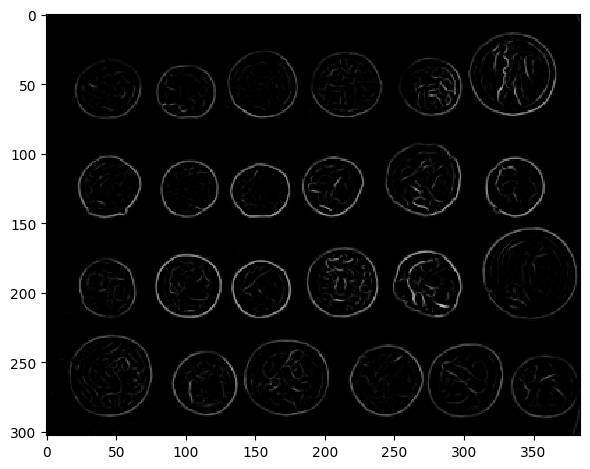

In [7]:
import skimage as ski

image = ski.data.coins()
# ... or any other NumPy array!
edges = ski.filters.frangi(image, sigmas=range(1, 10, 2), scale_range=None, scale_step=None, alpha=0.5, beta=0.5, gamma=None, black_ridges=True, mode='reflect', cval=0)

ski.io.imshow(edges)
ski.io.show()